In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd
import cosima_cookbook as cc


In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db')

In [3]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K

In [4]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
frazil_warm = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_warm = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_warm = net_sfc_warm+frazil_warm
mld_warm = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
vertically_integrated_heat_warm = (rho_0*c_p*dzt_warm*temp_warm.groupby('time.year').mean(dim='time')).sum('st_ocean')


In [5]:
expt = '1deg_jra55_ryf_rcpwarm'
temp_warmog = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
frazil_warmog = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_warmog = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_warmog = net_sfc_warmog+frazil_warmog
#dzt_warmog = cc.querying.getvar(expt,'dzt',session).groupby('time.year').mean(dim='time')
area_t_warmog = cc.querying.getvar(expt,'area_t',session, n=-1)
#SST_warmog = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
#vertically_integrated_heat_warmog = (rho_0*c_p*dzt_warmog*temp_warmog.groupby('time.year').mean(dim='time')).sum('st_ocean')


In [6]:
expt = '1deg_jra55_ryf_rcpcool'
temp_coolog = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
frazil_coolog = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_coolog = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_coolog = net_sfc_coolog+frazil_coolog
#dzt_coolog = cc.querying.getvar(expt,'dzt',session).groupby('time.year').mean(dim='time')
area_t_coolog = cc.querying.getvar(expt,'area_t',session, n=-1)
#SST_coolog = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
#vertically_integrated_heat_coolog = (rho_0*c_p*dzt_coolog*temp_coolog.groupby('time.year').mean(dim='time')).sum('st_ocean')

In [7]:
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable = 'temp_global_ave'
darray_warm2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_warm2x = darray_warm2x.groupby('time.year').mean(dim='time')
darray_swarm2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm2x = darray_swarm2x.groupby('time.year').mean(dim='time')
temp_warm2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm2x = temp_warm2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
frazil_warm2x = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_warm2x = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_warm2x = net_sfc_warm2x+frazil_warm2x
mld_warm2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
vertically_integrated_heat_warm2x = (rho_0*c_p*dzt_warm2x*temp_warm2x.groupby('time.year').mean(dim='time')).sum('st_ocean')


In [8]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable = 'temp_global_ave'
darray_cool = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool = darray_cool.groupby('time.year').mean(dim='time')
darray_scool = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool = darray_scool.groupby('time.year').mean(dim='time')
temp_cool = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool = temp_cool.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
frazil_cool = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_cool = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_cool = net_sfc_cool+frazil_cool
mld_cool = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
vertically_integrated_heat_cool = (rho_0*c_p*dzt_cool*temp_cool.groupby('time.year').mean(dim='time')).sum('st_ocean')


In [9]:
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable = 'temp_global_ave'
darray_cool2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool2x = darray_cool2x.groupby('time.year').mean(dim='time')
darray_scool2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool2x = darray_scool2x.groupby('time.year').mean(dim='time')
temp_cool2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool2x = temp_cool2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
frazil_cool2x = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_cool2x = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_cool2x = net_sfc_cool2x+frazil_cool2x
mld_cool2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
vertically_integrated_heat_cool2x = (rho_0*c_p*dzt_cool2x*temp_cool2x.groupby('time.year').mean(dim='time')).sum('st_ocean')


In [10]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
frazil_cont = cc.querying.getvar(expt,'frazil_3d_int_z',session)#.groupby('time.year').sum(dim='time')
net_sfc_cont = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')
surface_heat_flux_cont = net_sfc_cont+frazil_cont
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
vertically_integrated_heat_cont = (rho_0*c_p*dzt_cont*temp_cont.groupby('time.year').mean(dim='time')).sum('st_ocean')


### To plot
1. plot panel of control surf flux and surf flux anomalies at 50 years
2. vertically integrated heat content anomalies at 50 years
3. comparison of warm and warmhumid surface fluxes

In [11]:
dset = xr.merge([temp_cont.groupby('time.year').mean(dim='time').isel(year = 19,st_ocean = 0)])

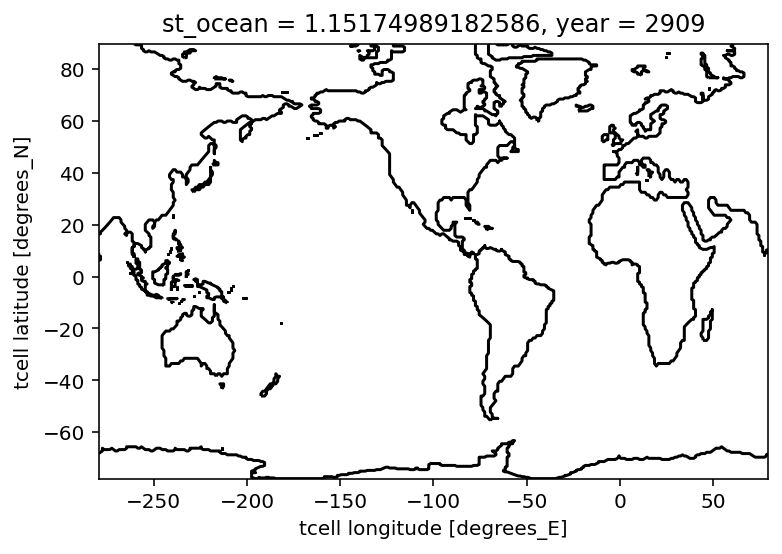

In [12]:
dset = xr.merge([temp_cont.groupby('time.year').mean(dim='time').isel(year = 19,st_ocean = 0)])
ds = dset
mask_ocean = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.temp)  
mask_land = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.temp)  
mask_array = mask_ocean + mask_land
mask_array.plot.contour(colors = 'k', levels = [2])

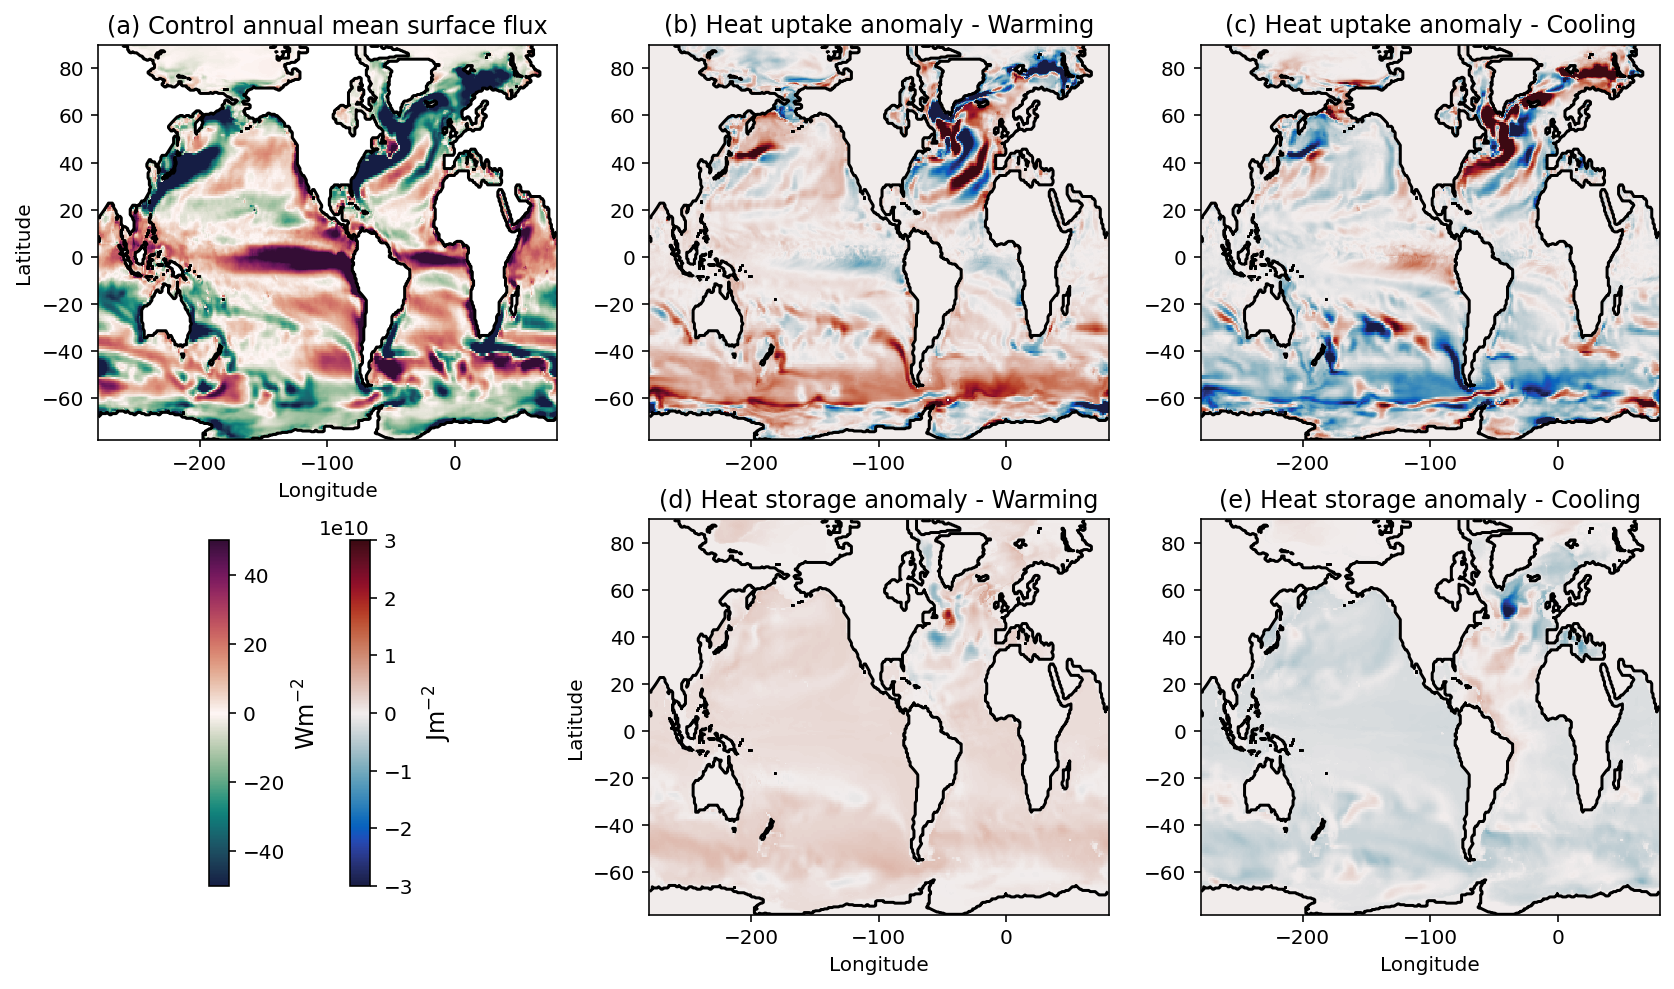

In [13]:
fig3 = plt.figure(figsize = (14,8))#constrained_layout=True,
#plt.suptitle('Heat uptake and storage', fontsize = 18)

gs = fig3.add_gridspec(2, 3)

f3_ax3 = fig3.add_subplot(gs[0,0])
CS2 = (surface_heat_flux_cont).mean('time').plot(ax = f3_ax3, vmin = -50,vmax = 50, add_colorbar = False,cmap = cm.cm.curl)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax3)
f3_ax3.set_title('(a) Control annual mean surface flux')
f3_ax3.set_ylabel('Latitude')
f3_ax3.set_xlabel('Longitude')

f3_ax4 = fig3.add_subplot(gs[0,1])
month_length = surface_heat_flux_cont.time.dt.days_in_month
((surface_heat_flux_warm-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2950-01-01')).sum('time').plot(ax = f3_ax4, cmap = cm.cm.balance, vmin = -3e10,vmax = 3e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax4)

f3_ax4.set_title('(b) Heat uptake anomaly - Warming')
f3_ax4.set_ylabel('')
f3_ax4.set_xlabel('')


f3_ax5 = fig3.add_subplot(gs[0,2])
((surface_heat_flux_cool-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2950-01-01')).sum('time').plot(ax = f3_ax5, cmap = cm.cm.balance,vmin = -3e10,vmax = 3e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax5)
f3_ax5.set_title('(c) Heat uptake anomaly - Cooling')
f3_ax5.set_ylabel('')
f3_ax5.set_xlabel('')

f3_ax1 = fig3.add_subplot(gs[1,1])
(vertically_integrated_heat_warm-vertically_integrated_heat_cont).isel(year = 49).plot(ax = f3_ax1, cmap = cm.cm.balance,vmin = -3e10,vmax = 3e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax1)
f3_ax1.set_title('(d) Heat storage anomaly - Warming')
f3_ax1.set_ylabel('Latitude')
f3_ax1.set_xlabel('Longitude')

f3_ax2 = fig3.add_subplot(gs[1,2])
CS = (vertically_integrated_heat_cool-vertically_integrated_heat_cont).isel(year = 49).plot(ax = f3_ax2, cmap = cm.cm.balance,vmin = -3e10,vmax = 3e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax2)
f3_ax2.set_title('(e) Heat storage anomaly - Cooling')
f3_ax2.set_ylabel('')
f3_ax2.set_xlabel('Longitude')

cb_ax = fig3.add_axes([0.25,0.15, 0.01, 0.3])
cbar = fig3.colorbar(CS, cax=cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)

cb_ax = fig3.add_axes([0.18, 0.15, 0.01, 0.3])
cbar = fig3.colorbar(CS2, cax=cb_ax)
cbar.ax.set_ylabel('Wm$^{-2}$', fontsize = 12)
plt.savefig('heatuptake',dpi = 600)

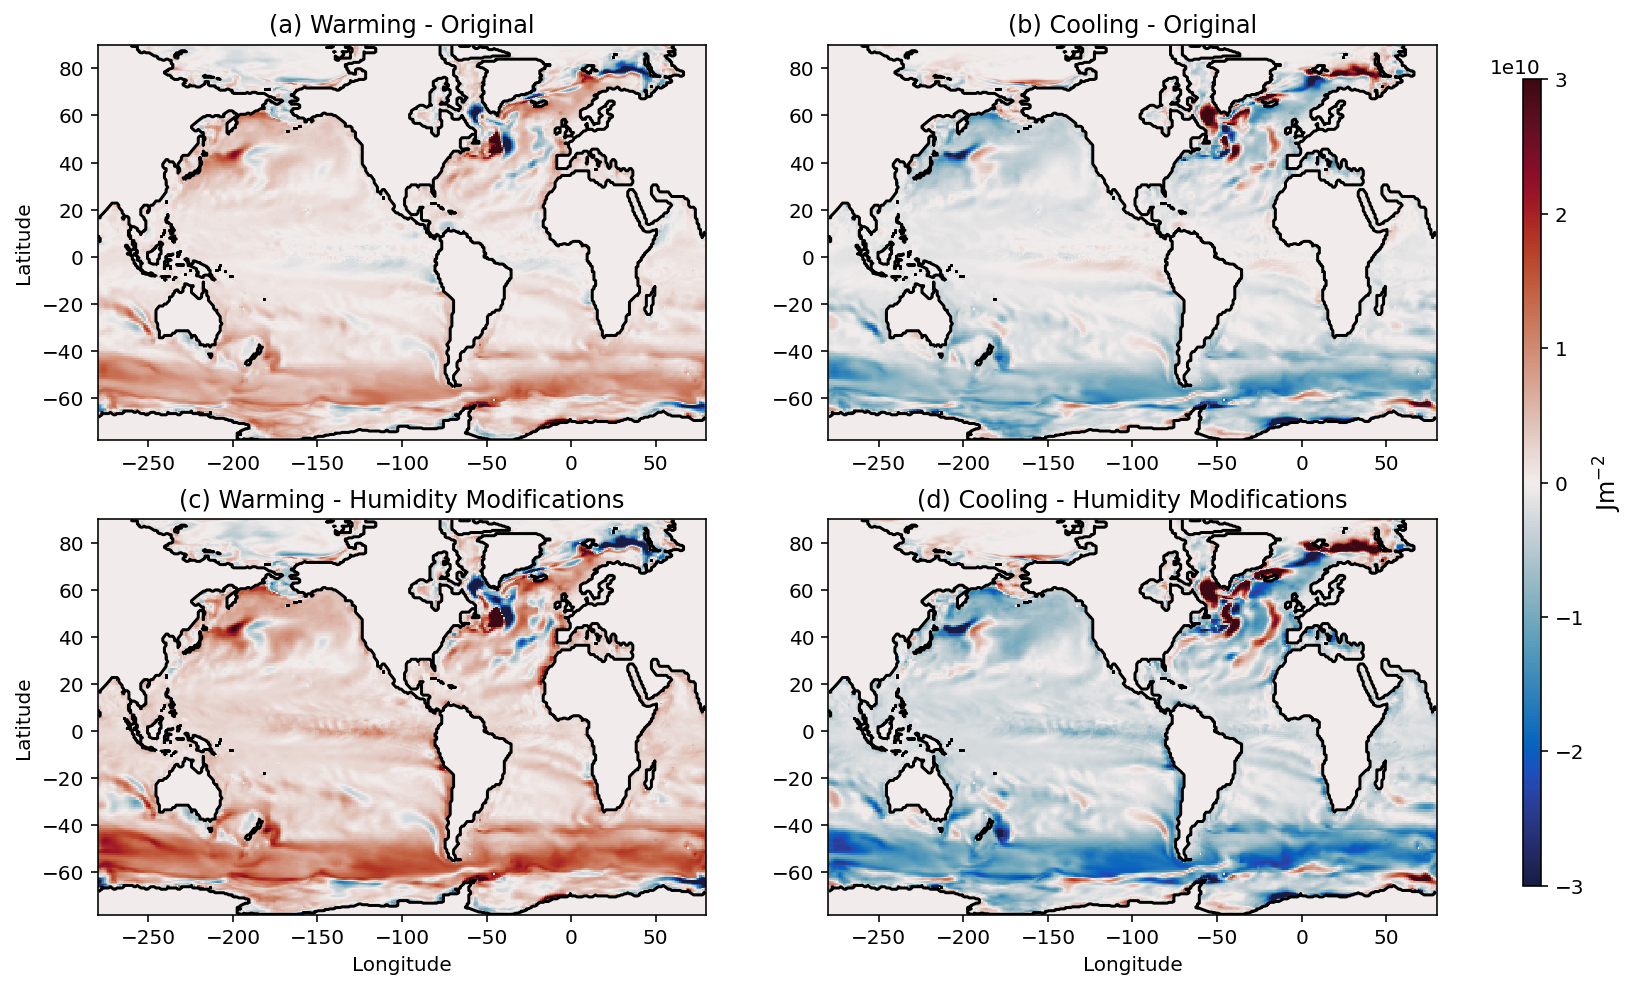

In [14]:
fig3 = plt.figure(figsize = (12,8))#constrained_layout=True,
#plt.suptitle('Surface forcing integrated over the first ten years of perturbations to highlight the importance of changing the humidity')

gs = fig3.add_gridspec(2, 2)

f3_ax3.set_ylabel('Latitude')
f3_ax3.set_xlabel('Longitude')

f3_ax4 = fig3.add_subplot(gs[0,0])
month_length = surface_heat_flux_cont.time.dt.days_in_month
((surface_heat_flux_warmog-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2910-01-01')).sum('time').plot(ax = f3_ax4, cmap = cm.cm.balance,vmin = -8e9,vmax = 8e9, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax4)
f3_ax4.set_title('(a) Warming - Original')
f3_ax4.set_ylabel('Latitude')
f3_ax4.set_xlabel('')

f3_ax5 = fig3.add_subplot(gs[0,1])
((surface_heat_flux_coolog-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2910-01-01')).sum('time').plot(ax = f3_ax5,cmap = cm.cm.balance, vmin = -8e9,vmax = 8e9, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax5)
f3_ax5.set_title('(b) Cooling - Original')
f3_ax5.set_ylabel('')
f3_ax5.set_xlabel('')

f3_ax2 = fig3.add_subplot(gs[1,0])
month_length = surface_heat_flux_cont.time.dt.days_in_month
((surface_heat_flux_warm-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2910-01-01')).sum('time').plot(ax = f3_ax2,cmap = cm.cm.balance, vmin = -8e9,vmax = 8e9, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax2)
f3_ax2.set_title('(c) Warming - Humidity Modifications')
f3_ax2.set_ylabel('Latitude')
f3_ax2.set_xlabel('Longitude')

f3_ax3 = fig3.add_subplot(gs[1,1])
((surface_heat_flux_cool-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01','2910-01-01')).sum('time').plot(ax = f3_ax3,cmap = cm.cm.balance, vmin = -8e9,vmax = 8e9, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = f3_ax3)
f3_ax3.set_title('(d) Cooling - Humidity Modifications')
f3_ax3.set_ylabel('')
f3_ax3.set_xlabel('Longitude')


cb_ax = fig3.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig3.colorbar(CS, cax=cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)

plt.savefig('humid',dpi = 600)